In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
import numpy as np
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline

In [12]:
data = pd.read_csv('nba2013_data.csv')
data = data.select_dtypes(['number'])
imp_mean = IterativeImputer(random_state=0)
data.replace('?.0','NaN', inplace = True)
imputed_DF = pd.DataFrame(imp_mean.fit_transform(data))
imputed_DF.columns = data.columns
imputed_DF.index = data.index
imputed_DF.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
0,23.0,63.0,0.0,847.0,66.0,141.0,0.468,4.0,15.0,0.266667,...,72.0,144.0,216.0,28.0,23.0,26.0,30.0,122.0,171.0,2013.0
1,20.0,81.0,20.0,1197.0,93.0,185.0,0.503,0.0,0.0,0.098607,...,142.0,190.0,332.0,43.0,40.0,57.0,71.0,203.0,265.0,2013.0
2,27.0,53.0,12.0,961.0,143.0,275.0,0.520,0.0,0.0,0.153420,...,102.0,204.0,306.0,38.0,24.0,36.0,39.0,108.0,362.0,2013.0
3,28.0,73.0,73.0,2552.0,464.0,1011.0,0.459,128.0,300.0,0.426667,...,32.0,230.0,262.0,248.0,35.0,3.0,146.0,136.0,1330.0,2013.0
4,25.0,56.0,30.0,951.0,136.0,249.0,0.546,0.0,1.0,0.000000,...,94.0,183.0,277.0,40.0,23.0,46.0,63.0,187.0,328.0,2013.0


In [13]:
data_scaled = normalize(imputed_DF)
data_scaled = pd.DataFrame(data_scaled, columns=imputed_DF.columns)
data_scaled.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
0,0.010346,0.028340,0.000000,0.381010,0.029689,0.063427,0.000211,0.001799,0.006748,0.000120,...,0.032388,0.064776,0.097164,0.012595,0.010346,0.011696,0.013495,0.054880,0.076922,0.905517
1,0.008239,0.033368,0.008239,0.493111,0.038312,0.076212,0.000207,0.000000,0.000000,0.000041,...,0.058498,0.078272,0.136769,0.017714,0.016478,0.023481,0.029249,0.083627,0.109168,0.829267
2,0.011529,0.022631,0.005124,0.410344,0.061061,0.117424,0.000222,0.000000,0.000000,0.000066,...,0.043554,0.087107,0.130661,0.016226,0.010248,0.015372,0.016653,0.046116,0.154573,0.859546
3,0.007298,0.019027,0.019027,0.665149,0.120936,0.263505,0.000120,0.033362,0.078192,0.000111,...,0.008340,0.059947,0.068287,0.064638,0.009122,0.000782,0.038053,0.035447,0.346649,0.524665
4,0.010759,0.024100,0.012911,0.409276,0.058530,0.107161,0.000235,0.000000,0.000430,0.000000,...,0.040454,0.078757,0.119211,0.017215,0.009898,0.019797,0.027113,0.080478,0.141159,0.866323


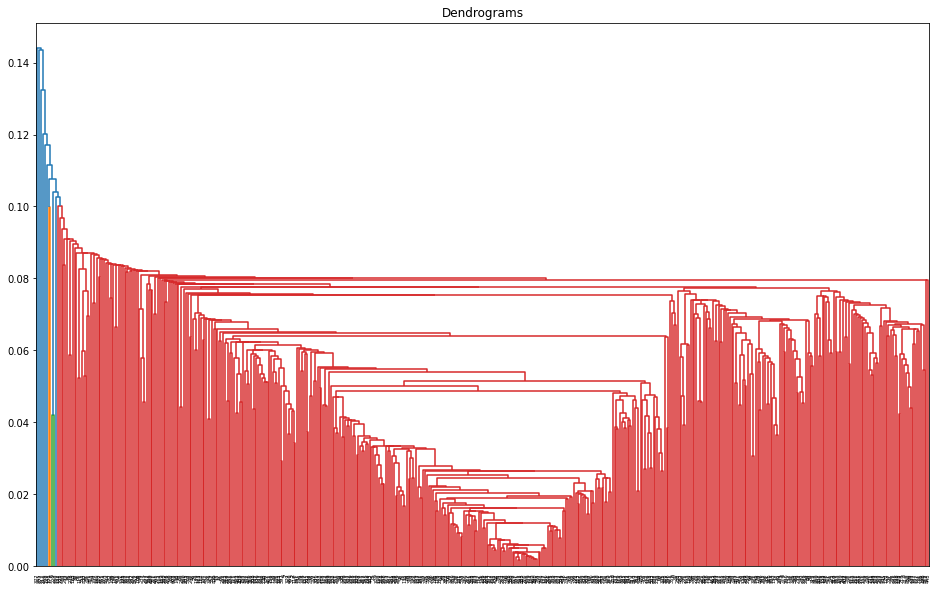

In [17]:
plt.figure(figsize=(16, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='single'))

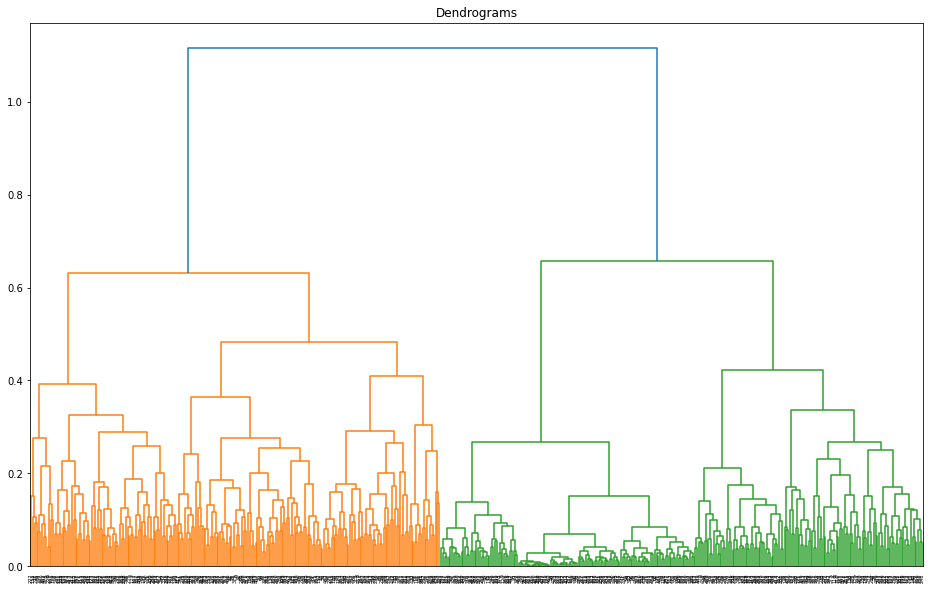

In [18]:
plt.figure(figsize=(16, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='complete'))

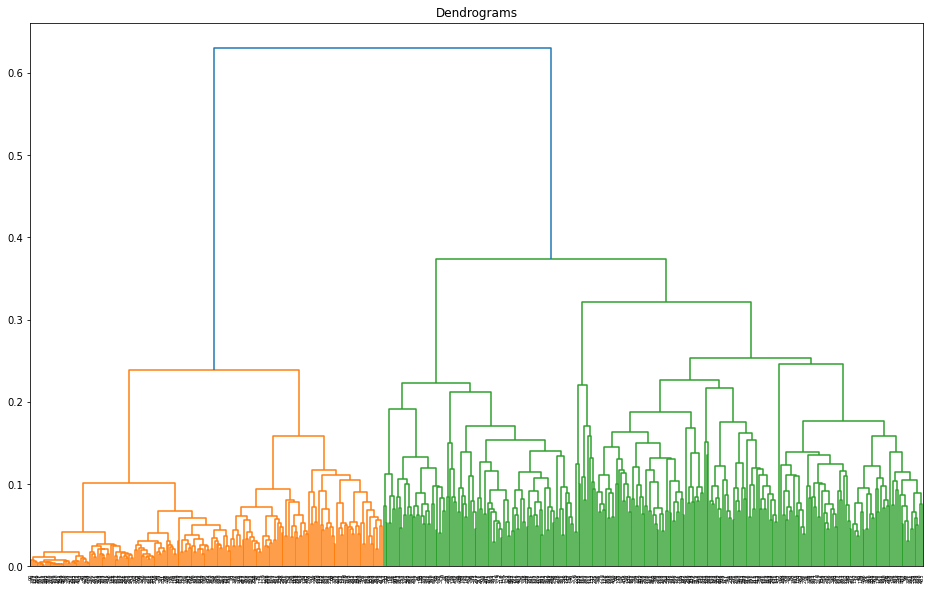

In [21]:
plt.figure(figsize=(16, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='average'))

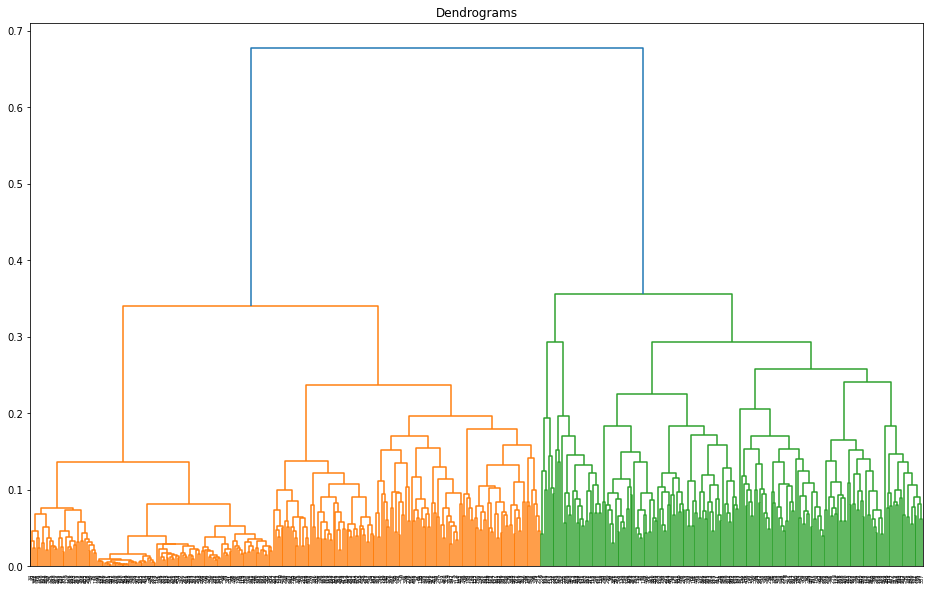

In [22]:
plt.figure(figsize=(16, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='weighted'))